AttributeError: 'FuncAnimation' object has no attribute 'show'

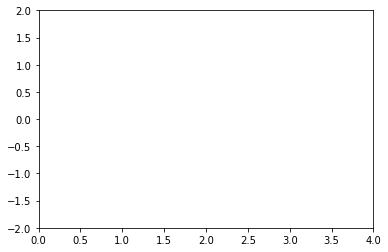

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation 
   
# initializing a figure in 
# which the graph will be plotted
fig = plt.figure() 
   
# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 4),  ylim =(-2, 2)) 
  
# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,
   
def animate(i):
    x = np.linspace(0, 4, 1000)
   
    # plots a sine graph
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
      
    return line,
   
anim = FuncAnimation(fig, animate, init_func = init,
                     frames = 200, interval = 20, blit = True)
  
   
#anim.save('continuousSineWave.mp4', writer = 'ffmpeg', fps = 30))
anim.show()

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML


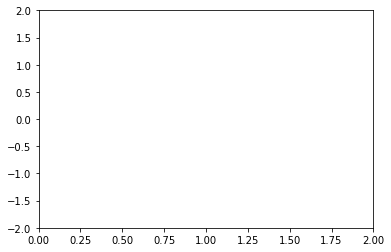

In [9]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [10]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [11]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [12]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [13]:
HTML(anim.to_html5_video())

In [14]:
anim._repr_html_() is None

True

In [15]:
anim

In [16]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [17]:
anim

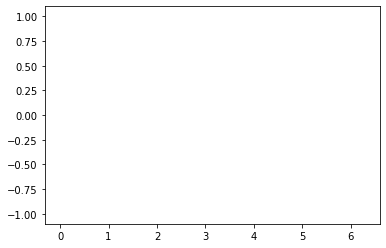

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()


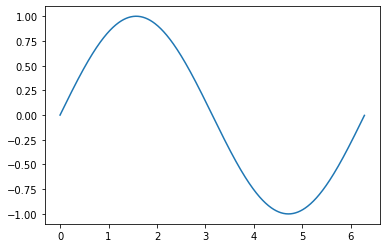

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 50))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

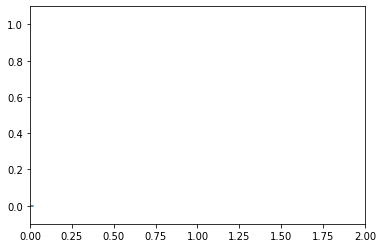

In [22]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.animation as animation


class Scope:
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt > self.tdata[0] + self.maxt:  # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def emitter(p=0.1):
    """Return a random value in [0, 1) with probability p, else 0."""
    while True:
        v = np.random.rand(1)
        if v > p:
            yield 0.
        else:
            yield np.random.rand(1)


# Fixing random state for reproducibility
np.random.seed(19680801 // 10)


fig, ax = plt.subplots()
scope = Scope(ax)

# pass a generator in "emitter" to produce data for the update func
ani = animation.FuncAnimation(fig, scope.update, emitter, interval=50, blit=True)

plt.show()

In [28]:
import time
f = open("data.txt", "w")
while True:
    print(time.strftime("%H:%M:%S", time.localtime()) ,end="  ")
    f.write("Dear ${PERSON_NAME},\nThis is a test message.\nHave a great weekend! \nYours Truly\n")
    f.close()
    time.sleep(1)
    

18:42:14  18:42:15  18:42:16  18:42:17  18:42:18  18:42:19  18:42:20  18:42:21  

KeyboardInterrupt: 

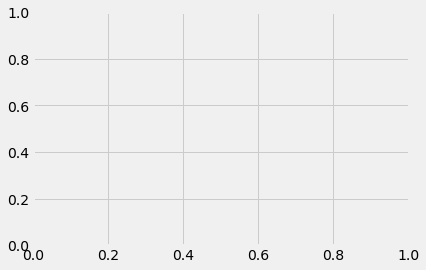

In [30]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('http://localhost:8888/edit/7.Python-Project/AI_ML_DL/LivePlot/Data.CSV','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    ax1.clear()
    ax1.plot(xs, ys)

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

In [32]:
import tkinter

from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure

import numpy as np


root = tkinter.Tk()
root.wm_title("Embedding in Tk")

fig = Figure(figsize=(5, 4), dpi=100)
t = np.arange(0, 3, .01)
fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))

canvas = FigureCanvasTkAgg(fig, master=root)  # A tk.DrawingArea.
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)


def on_key_press(event):
    print("you pressed {}".format(event.key))
    key_press_handler(event, canvas, toolbar)


canvas.mpl_connect("key_press_event", on_key_press)


def _quit():
    root.quit()     # stops mainloop
    root.destroy()  # this is necessary on Windows to prevent
                    # Fatal Python Error: PyEval_RestoreThread: NULL tstate
        
button = tkinter.Button(master=root, text="Quit", command=_quit)
button.pack(side=tkinter.BOTTOM)
tkinter.mainloop()

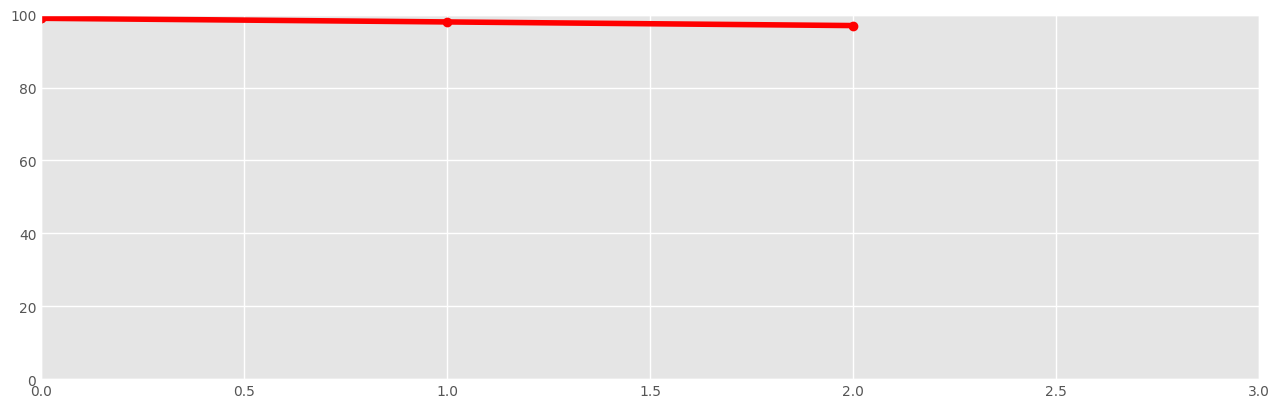

In [36]:
#import serial
from tkinter import *
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


root = Tk()
root.geometry('1200x700+200+100')
root.title('This is my root window')
root.state('zoomed')
#root.config(background='#fafafa')

xar = []
yar = []

style.use('ggplot')
fig = plt.figure(figsize=(14, 4.5), dpi=100)
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_ylim(0, 100)
line, = ax1.plot(xar, yar, 'r', marker='o')
#ser = serial.Serial('com3', 9600)

def animate(i):
    #ser.reset_input_buffer()
    #data = ser.readline().decode("utf-8")
    #data_array = data.split(',')
    #yvalue = float(data_array[1])
    yar.append(99-i)
    xar.append(i)
    line.set_data(xar, yar)
    ax1.set_xlim(0, i+1)


plotcanvas = FigureCanvasTkAgg(fig, root)
plotcanvas.get_tk_widget().grid(column=1, row=1)
ani = animation.FuncAnimation(fig, animate, interval=1000, blit=False)

root.mainloop()

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('example.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    for line in lines:
        if len(line) > 1:
            x, y = line.split(',')
            xs.append(float(x))
            ys.append(float(y))
    ax1.clear()
    ax1.plot(xs, ys)

ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

import numpy as np
import matplotlib.pyplot as plot
# Get x values of the sine wave
time        = np.arange(0, 10, 0.1);
# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(time)
# Plot a sine wave using time and amplitude obtained for the sine wave
plot.plot(time, amplitude)
# Give a title for the sine wave plot
plot.title('Sine wave')
# Give x axis label for the sine wave plot
plot.xlabel('Time')
# Give y axis label for the sine wave plot
plot.ylabel('Amplitude = sin(time)')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.show()
# Display the sine wave
plot.show()